# Final Project Part 1 - Dataset Exploration

- Final Project Group 32
- Memebers:
    - Anushka Gami
    - Ashwini Sarvepalli
    - Angela Watters

#### What is the "name" of the dataset?
The name of this dataset is: UFO Sightings around the world

#### Where did you obtain it?
Using the google dataset serach, I was able to find this dataset from Kaggle, and the author/owner said in their acknowledgments that they found the data at this github link https://github.com/planetsig/ufo-reports. Along with this data, they added "some column headers and just described what [they've] seen"

#### Where can we obtain it? (i.e., URL)
This is the link to the Kaggle dataset: https://www.kaggle.com/datasets/camnugent/ufo-sightings-around-the-world?resource=download and I have uploaded to csv file along with this python notebook for submission.

#### What is the license of the dataset? What are we allowed to do with it?
This dataset has the CC0 1.0 Universal Public Domain Dedication dataset. This license means that the person has dedicated the work to the public domain by waiving all of their rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law. So that means we can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission. This is all according to the official creative commons website.

#### How big is it in file size and in items?  Looking ahead, how does this relate to GitHub's limits Links to an external site on uploading large files?  If you plan on hosting the data yourself and it is larger than GitHub's limits, state your plan for how you will address this issue. 
This csv file is is 13.7 MB and has 80332 rows and 11 columms of data. Meaning that there are 80332 entries of data for sightings. 

The columns include: 

- Date_time - standardized date and time of sighting

- city - location of UFO sighting

- state/province - the US state or Canadian province, appears blank for other locations

- country - Country of UFO sighting

- UFO_shape - a one word description of the "spacecraft"

- lengthofencounter_seconds - standardized to seconds, length of the observation of the UFO

- described_duration _of_encounter - raw description of the length of the encounter (shows uncertainty to previous column)

- description - text description of the UFO encounter. Warning column is messy, with some curation it could lend itself to some natural language processing and sentiment analysis.

- date_documented - when was the UFO sighting reported

- latitude - latitude

- longitude - longitude

Github limits files above 100MB so we don't have to worry about hosting the data ourselves.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
import numpy as np
import ipywidgets

In [2]:
data_url = './ufo_sighting_data.csv'
data = pd.read_csv(data_url, dtype={"length_of_encounter_seconds": "string", "latitude": "string"})
data.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
data.shape
data.isnull().sum()

Date_time                             0
city                                  0
state/province                     5797
country                            9670
UFO_shape                          1932
length_of_encounter_seconds           0
described_duration_of_encounter       0
description                          15
date_documented                       0
latitude                              0
longitude                             0
dtype: int64

In [4]:
data['country'].unique()
data['country'].value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

In [5]:
# create new columns for date for easier data analysis
data[['date','time']] = data['Date_time'].str.split(expand=True)
data['datetime'] = (pd.to_datetime(data.pop('date'), format='%m/%d/%Y') + 
                  pd.to_timedelta(data.pop('time') + ':00'))
data['year'] = pd.DatetimeIndex(data['datetime']).year
data.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,datetime,year
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10 20:30:00,1949
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949-10-10 21:00:00,1949
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955-10-10 17:00:00,1955
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10 21:00:00,1956
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10 20:00:00,1960


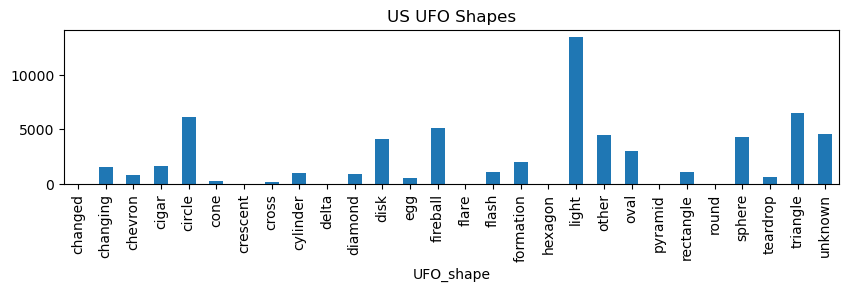

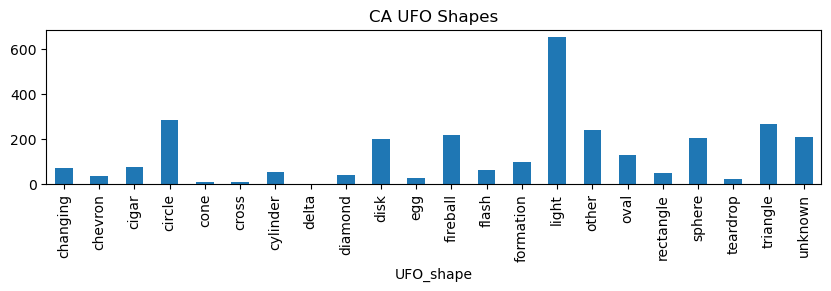

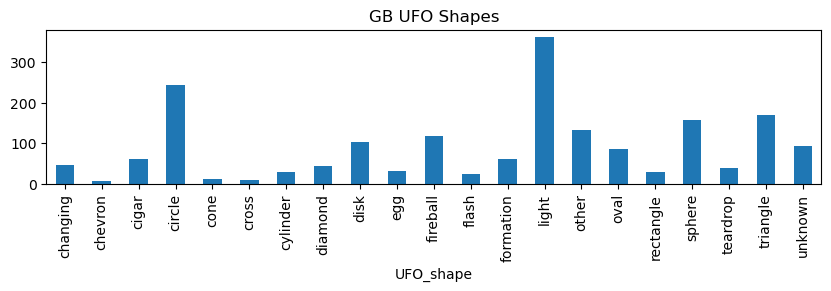

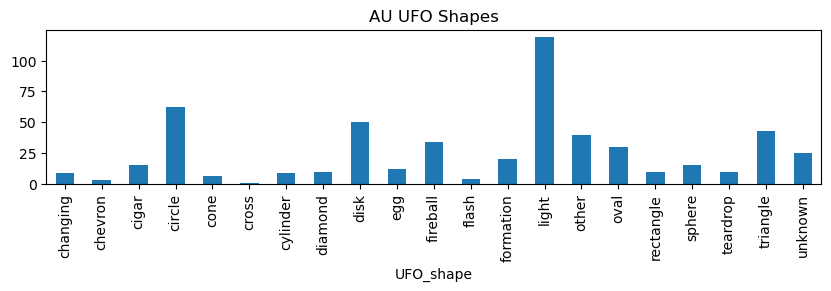

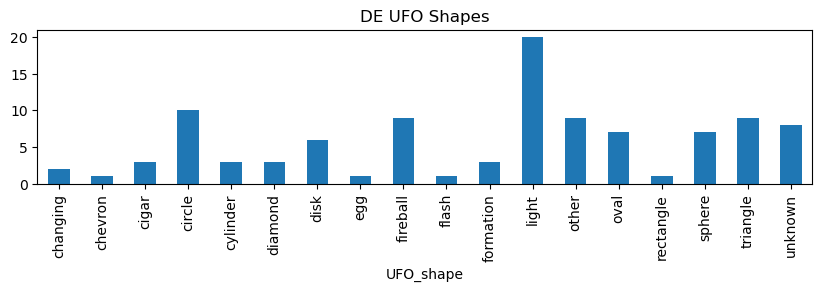

In [6]:
#Plots of Types of UFO Shapes Seen By Country

#us
dataUS = data.loc[data['country'] == 'us'] 
dU = pd.DataFrame()
dU['count'] = dataUS['country']
dU['UFO_shape'] = dataUS['UFO_shape']
dUO = dU.groupby(dU['UFO_shape']).count()
dUO.plot(kind='bar', legend=False, title="US UFO Shapes", figsize=(10, 2))

#ca     
dataCA = data.loc[data['country'] == 'ca'] 
dC = pd.DataFrame()
dC['count'] = dataCA['country']
dC['UFO_shape'] = dataCA['UFO_shape']
dCO = dC.groupby(dC['UFO_shape']).count()
dCO.plot(kind='bar', legend=False, title="CA UFO Shapes", figsize=(10, 2))

#gb 
dataGB = data.loc[data['country'] == 'gb'] 
dG = pd.DataFrame()
dG['count'] = dataGB['country']
dG['UFO_shape'] = dataGB['UFO_shape']
dGO = dG.groupby(dG['UFO_shape']).count()
dGO.plot(kind='bar', legend=False, title="GB UFO Shapes", figsize=(10, 2))

#au    
dataAU = data.loc[data['country'] == 'au'] 
dA = pd.DataFrame()
dA['count'] = dataAU['country']
dA['UFO_shape'] = dataAU['UFO_shape']
dAO = dA.groupby(dA['UFO_shape']).count()
dAO.plot(kind='bar', legend=False, title="AU UFO Shapes", figsize=(10, 2))

#de      
dataDE = data.loc[data['country'] == 'de'] 
dD = pd.DataFrame()
dD['count'] = dataDE['country']
dD['UFO_shape'] = dataDE['UFO_shape']
dDO = dD.groupby(dD['UFO_shape']).count()
dDO.plot(kind='bar', legend=False, title="DE UFO Shapes", figsize=(10, 2))

# Plot Write Up

This plot explores if certain UFO shapes are more likely to be seen in different geographical regions/countries. Generally, we can see that light is the most common among all of the countries, but it is still interesting to see the distribution of these shapes based on the country. We can also see a slight skew in the data because there seem to be more sightings in the USA, but this can be due to the data collection methods possibly focusing mostly on the USA.

#### CREATE PLOT NOT WORKING
Where:
- X-AXIS is the YEAR 
- Y-AXIS is the number of sightings, 
and have lines for each country

In [7]:
# d = pd.DataFrame()
# d['year'] = dataUS['year']
# d['country'] = dataUS['country']
# d1 = d.groupby(d['year']).head()
# d1.set_index('year', append=True)
# d1
# d1.plot.line()

Text(0.5, 1.0, 'UFO SHAPE PERCENTAGES')

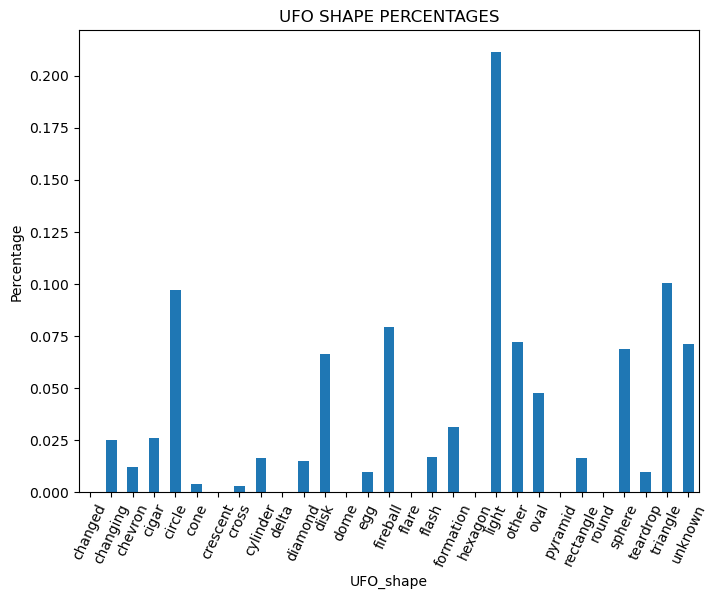

In [8]:
ufo_shape = data.groupby(by='UFO_shape').count()
ufo_shape_percent = ufo_shape.Date_time / ufo_shape.Date_time.sum()

ax = ufo_shape_percent.plot.bar(rot=65, figsize=(8,6))
ax.set_ylabel('Percentage')
ax.set_title('UFO SHAPE PERCENTAGES')

#### ANOTHER PLOT IDEA NOT WORK
With more time I would plot that calculates the average number of sightings based on the hour of the day
(are people more likely to see something super late at night or super early in the morning, afternoon, or evening)

and also a plot for sightings based on location in the hemisphere(do people in the north or south hemisphere see more sightings)

In [9]:
# by_month_north = data[data.latitude > 0].count()
# by_month_south = data[data.latitude < 0].count()

Would be interesting to also see the UFO_shape and correlation to thelenght of the encounter or the durations of encounter that people see the UFO

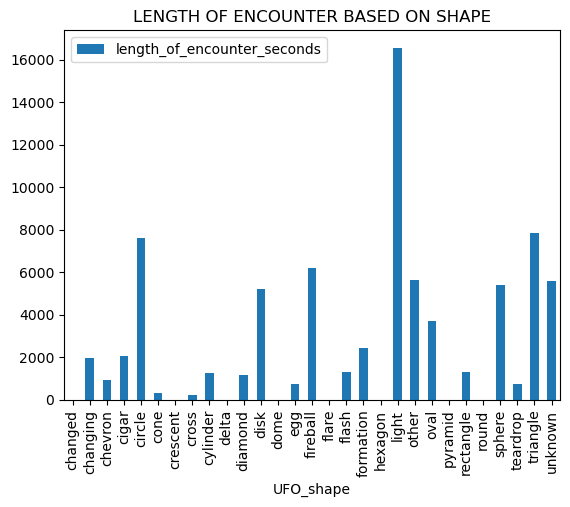

In [10]:
dUFOlen = pd.DataFrame()
dUFOlen['length_of_encounter_seconds'] = data['length_of_encounter_seconds']
dUFOlen['UFO_shape'] = data['UFO_shape']
grp = dUFOlen.groupby(by='UFO_shape').count()
grp.head()
grp.plot.bar(title="LENGTH OF ENCOUNTER BASED ON SHAPE")


In [11]:
data['latitude'] = pd.to_numeric(data['latitude'],errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'],errors='coerce')

gdf = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.longitude, data.latitude))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

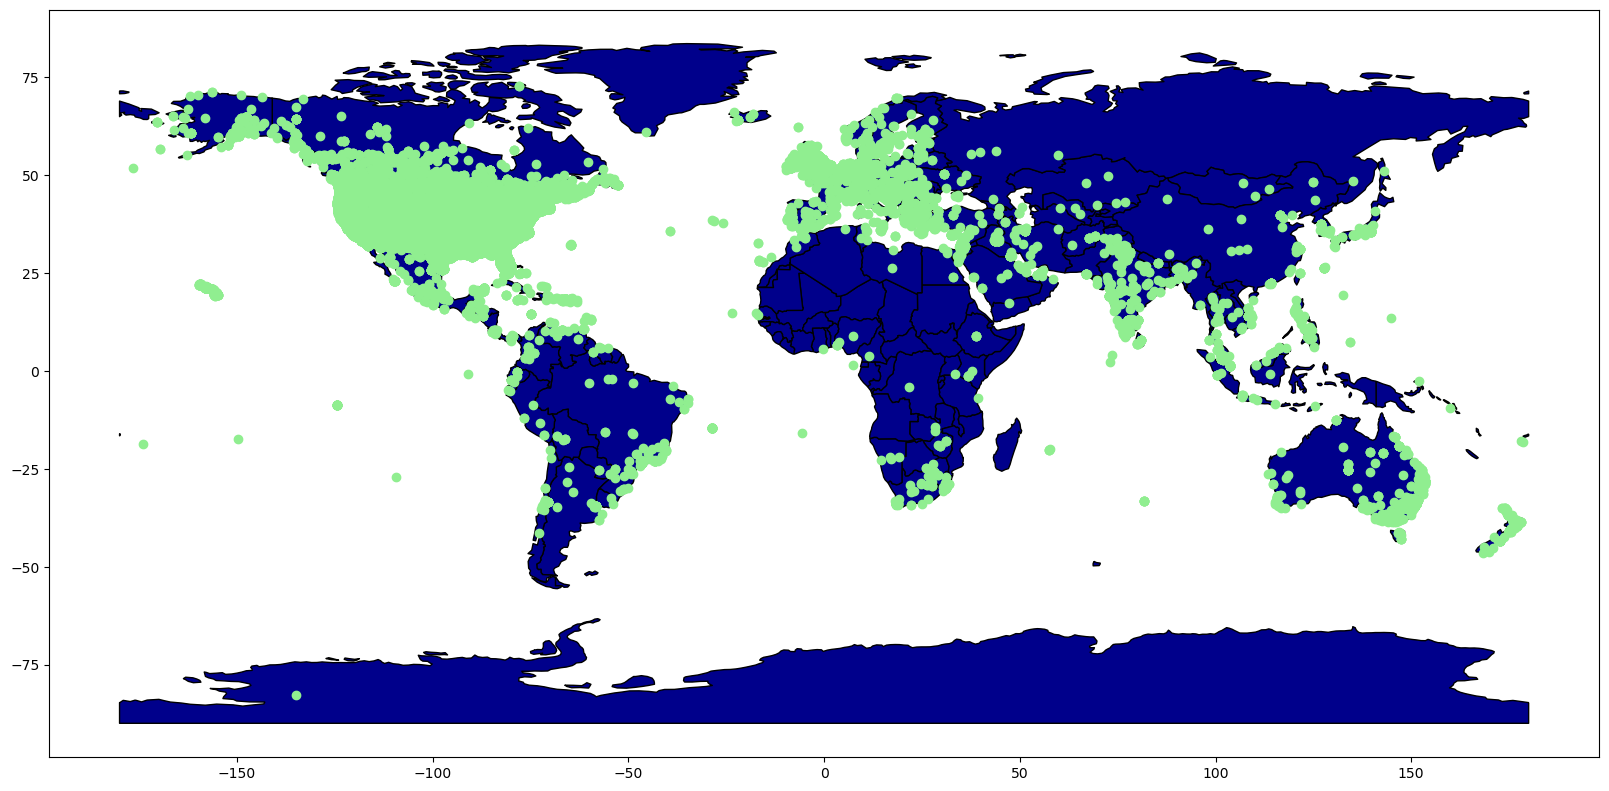

In [12]:
fig, ax = plt.subplots(figsize=(20,10))

world.plot(ax=ax, edgecolor='k', color='darkblue')
gdf.plot(ax=ax, color='lightgreen')

plt.show()

It would be interesting maybe to combine this data with other space based data such as when comets or metor showers occur because there is a chance that people are seeing space debris rather than a UFO potentially

### Sources
Kaggle Dataset: https://www.kaggle.com/datasets/camnugent/ufo-sightings-around-the-world?resource=download

Creative Commons: https://creativecommons.org/publicdomain/zero/1.0/ 

Notebook Exploration Inspiration: https://www.kaggle.com/code/sagarsy2050/ufo-sightings

Geopandas from Pandas: https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html